In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [2]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([52, 55, 61, 70, 82])


In [3]:

linear_model = LinearRegression()
linear_model.fit(X, y)

beta_0 = linear_model.intercept_
beta_1 = linear_model.coef_[0]

print(f"Linear Regression Equation:")
print(f"ŷ = {beta_0:.2f} + {beta_1:.2f}x")


Linear Regression Equation:
ŷ = 41.50 + 7.50x


In [4]:

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

print("Polynomial Regression Coefficients:")
for i, coef in enumerate(poly_model.coef_):
    print(f"w{i} = {coef:.4f}")
print(f"w0 (Intercept) = {poly_model.intercept_:.4f}")


Polynomial Regression Coefficients:
w0 = 0.0000
w1 = -1.5000
w2 = 1.5000
w3 = 0.0000
w4 = -0.0000
w0 (Intercept) = 52.0000


In [5]:
x_test = np.array([[6]])

y_pred_linear = linear_model.predict(x_test)

x_test_poly = poly.transform(x_test)
y_pred_poly = poly_model.predict(x_test_poly)

print(f"Prediction at x = 6 hours:")
print(f"Linear Model Prediction = {y_pred_linear[0]:.2f}")
print(f"Polynomial Model Prediction = {y_pred_poly[0]:.2f}")


Prediction at x = 6 hours:
Linear Model Prediction = 86.50
Polynomial Model Prediction = 97.00


In [6]:
y_train_pred_linear = linear_model.predict(X)
y_train_pred_poly = poly_model.predict(X_poly)

mse_linear = mean_squared_error(y, y_train_pred_linear)
mse_poly = mean_squared_error(y, y_train_pred_poly)

print(f"Training MSE:")
print(f"Linear Model MSE = {mse_linear:.4f}")
print(f"Polynomial Model MSE = {mse_poly:.4f}")


Training MSE:
Linear Model MSE = 6.3000
Polynomial Model MSE = 0.0000


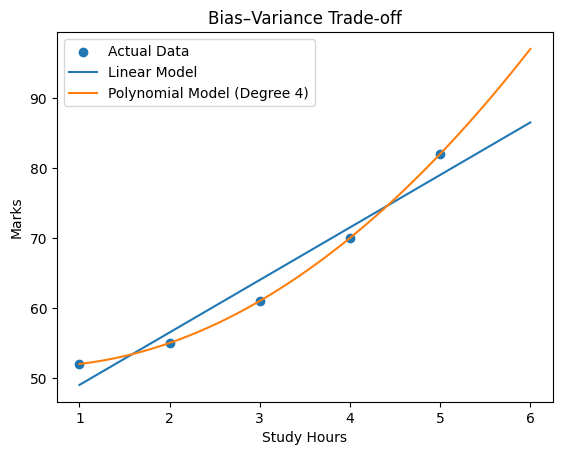

In [7]:
plt.scatter(X, y, label="Actual Data")

X_range = np.linspace(1, 6, 100).reshape(-1, 1)
plt.plot(X_range, linear_model.predict(X_range), label="Linear Model")

X_range_poly = poly.transform(X_range)
plt.plot(X_range, poly_model.predict(X_range_poly), label="Polynomial Model (Degree 4)")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.legend()
plt.title("Bias–Variance Trade-off")
plt.show()


# New Section